# WeatherPy - Leo Santos - Analysis 
----

### Analysis
#1 In terms of latitude and max temperature, as of Feb 23, 2019, data shows warmer temperatures mostly leaning below 20 degrees north latitude (tropic of cancer) and mainly below the equator (southern hemisphere). These observations follow expected behavior: summer in the south and winter in the north at the moment. 

#2 City latitude does not seem to explain humidity; there not seem to be a strong correlation between these two variables.  In fact, I confirmed a very low R2 via excel.  Interesting fact: as I run the model several times, there were a few times where one or two outliers at >100% appeared on the plot.  It will have hard to live in "Paita, Peru" where there is a 290% humidity!

#3 Latitude and cloudiness don't show a strong correlation.  there are a couple of horizontal lines that could somehow group many cloudiness levels; however, it will give no signs of correlation. 

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#general note. all code should address homework requirements; data extraction is validated via status code.
#regarding extraction, I am providing printing to satify homework request; in addition, I am writing a file.
#charts are both

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# using time module to include today's date stamp on certain items such as chart titles and filenames
t = time.strftime("%m_%d_%Y")



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [3]:
# initializing lists for extraction. also, initializing dataframe which will receive those lists. 
res = []
q = []
cy = []
cloud = []
co = []
date1 = []
hum = []
lat = []
long = []
xtemp = []
ws =[]
d = pd.DataFrame()


# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


In [4]:
# Loop through the list of cities and perform a request for data on each
#counter for data retrieval csv
i = 1 
output_path = ("data_retrieval.txt") #initializing csv path for data retrieval
with open(output_path, 'w', newline='') as datafile:
    csvwriter = csv.writer(datafile, delimiter=',')
    csvwriter.writerow([(f"Beginning Data Retrieval")])
    csvwriter.writerow([(f"------------------------")])

    for city in cities: #looping for data extraction, printing and writing
        response = requests.get(query_url + city).json()
        if response['cod'] == 200: #extraction validator. cod = 200 ensures we only excract successful api calls
            cy.append(city) #appending data on lists 
            lat.append(response['coord']['lat'])
            long.append(response['coord']['lon'])
            #res.append(response['cod']) # this and the following line were just part of the testing; I commented t
            #q.append(query_url + city)
            cloud.append(response['clouds']['all'])
            co.append(response['sys']['country'])
            date1.append(response['dt'])
            hum.append(response['main']['humidity'])
            xtemp.append(response['main']['temp_max'])
            ws.append(response['wind']['speed'])
            
            c2 = city.replace(" ","%20") #this will ensure URL's are fully clickable
            
            print(f"Procesing record {i} | {city}.") #printing progress of extraction. this is not really needed since 
            print(query_url + c2)
          
            csvwriter.writerow([(f"Procesing record {i} | {city}.")]) #writing 
            csvwriter.writerow([(query_url + c2)])
            
            i = i + 1 #counter to ensure printing corresponds to actual item being process
            
    csvwriter.writerow([(f"------------------------")])
    csvwriter.writerow([(f"Data Retrieval Complete")])
    csvwriter.writerow([(f"------------------------")])
        
        
        
        
   


Procesing record 1 | cabo san lucas.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=cabo%20san%20lucas
Procesing record 2 | bambous virieux.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=bambous%20virieux
Procesing record 3 | mataura.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=mataura
Procesing record 4 | vaini.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=vaini
Procesing record 5 | rikitea.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=rikitea
Procesing record 6 | khatanga.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=khatanga
Procesing record 7 | atuona.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=at

Procesing record 58 | georgetown.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=georgetown
Procesing record 59 | tahe.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=tahe
Procesing record 60 | tabou.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=tabou
Procesing record 61 | birjand.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=birjand
Procesing record 62 | padang.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=padang
Procesing record 63 | opuwo.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=opuwo
Procesing record 64 | hobart.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=hobart
Procesing record 65 | bluff.
htt

Procesing record 116 | lompoc.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=lompoc
Procesing record 117 | uri.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=uri
Procesing record 118 | bajil.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=bajil
Procesing record 119 | port-cartier.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=port-cartier
Procesing record 120 | puerto leguizamo.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=puerto%20leguizamo
Procesing record 121 | tuktoyaktuk.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=tuktoyaktuk
Procesing record 122 | verkhovazhye.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=m

Procesing record 173 | kronshagen.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=kronshagen
Procesing record 174 | dingle.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=dingle
Procesing record 175 | ereymentau.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=ereymentau
Procesing record 176 | camabatela.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=camabatela
Procesing record 177 | sur.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=sur
Procesing record 178 | cartagena.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=cartagena
Procesing record 179 | boa vista.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=boa%20v

Procesing record 230 | bima.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=bima
Procesing record 231 | sampit.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=sampit
Procesing record 232 | banda aceh.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=banda%20aceh
Procesing record 233 | mayya.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=mayya
Procesing record 234 | krasnooktyabrskiy.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=krasnooktyabrskiy
Procesing record 235 | alofi.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=alofi
Procesing record 236 | tessalit.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=tessalit

Procesing record 288 | kenai.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=kenai
Procesing record 289 | esperance.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=esperance
Procesing record 290 | kruisfontein.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=kruisfontein
Procesing record 291 | gizo.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=gizo
Procesing record 292 | maldonado.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=maldonado
Procesing record 293 | port hardy.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=port%20hardy
Procesing record 294 | kyshtovka.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=kys

Procesing record 346 | sitka.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=sitka
Procesing record 347 | podor.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=podor
Procesing record 348 | ulaangom.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=ulaangom
Procesing record 349 | basse.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=basse
Procesing record 350 | newport.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=newport
Procesing record 351 | grindavik.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=grindavik
Procesing record 352 | neman.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=neman
Procesing record 353 | 

Procesing record 404 | taoudenni.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=taoudenni
Procesing record 405 | haapiti.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=haapiti
Procesing record 406 | bay roberts.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=bay%20roberts
Procesing record 407 | caxito.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=caxito
Procesing record 408 | morris.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=morris
Procesing record 409 | russell.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=russell
Procesing record 410 | marrakesh.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=marrakesh

Procesing record 462 | fort nelson.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=fort%20nelson
Procesing record 463 | senanga.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=senanga
Procesing record 464 | eschborn.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=eschborn
Procesing record 465 | jalu.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=jalu
Procesing record 466 | urucara.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=urucara
Procesing record 467 | cockburn town.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=cockburn%20town
Procesing record 468 | vitim.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=vit

Procesing record 519 | sakaraha.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=sakaraha
Procesing record 520 | satis.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=satis
Procesing record 521 | port arthur.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=port%20arthur
Procesing record 522 | shache.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=shache
Procesing record 523 | horasan.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=horasan
Procesing record 524 | mangan.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=mangan
Procesing record 525 | qasigiannguit.
http://api.openweathermap.org/data/2.5/weather?appid=2541ce6d49e1e94f0f8e5690481f3a6e&units=metric&q=qasigianngu

In [5]:
#adding lists to dataframes

d['City'] = cy
d['Cloudiness'] = cloud
d['Country'] = co
d['Date'] = date1
d['Humidity'] = hum
d['Lat'] = lat
d['Lng'] = long
d['Max Temp'] = xtemp
d['Wind Speed'] = ws

#writing a file with resulting dataframe 
d.to_csv(f"output_data_file_{t}.csv", index=False)

In [6]:
d #resuting dataframe

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cabo san lucas,20,MX,1551059160,59,22.89,-109.91,19.00,2.10
1,bambous virieux,40,MU,1551060000,83,-20.34,57.76,27.00,4.10
2,mataura,12,NZ,1551061757,46,-46.19,168.86,17.05,4.86
3,vaini,0,IN,1551060000,49,15.34,74.49,20.00,1.71
4,rikitea,92,PF,1551061757,100,-23.12,-134.97,26.67,6.26
5,khatanga,56,RU,1551061758,56,71.98,102.47,-24.38,2.31
6,atuona,0,PF,1551061758,100,-9.80,-139.03,27.17,4.01
7,liverpool,0,GB,1551059400,93,53.41,-2.98,5.00,3.60
8,vostok,68,RU,1551061759,63,46.45,135.83,-6.28,2.31
9,comodoro rivadavia,40,AR,1551060000,39,-45.87,-67.48,9.00,2.60


In [7]:
d.describe() #I usually use this to get a sense of data

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,551.000000,5.510000e+02,551.000000,551.000000,551.000000,551.000000,551.000000
mean,35.450091,1.551061e+09,73.419238,21.314936,13.650726,9.490272,3.735590
std,34.661385,1.179724e+03,20.706089,33.593480,88.253964,15.990410,2.908684
min,0.000000,1.551056e+09,0.000000,-54.810000,-173.230000,-35.680000,0.210000
25%,0.000000,1.551060e+09,60.000000,-7.895000,-63.130000,-1.090000,1.500000
50%,24.000000,1.551062e+09,78.000000,29.140000,15.160000,12.350000,3.060000
75%,75.000000,1.551062e+09,91.000000,49.880000,84.440000,23.770000,5.100000
max,100.000000,1.551062e+09,100.000000,78.220000,179.320000,37.000000,20.600000


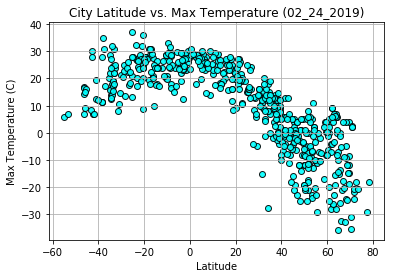

In [8]:
# the subsquent scatter plot charts follow similar steps

fig, ax = plt.subplots()

# assigning data to axis

x_axis = d['Lat']
y_axis = d['Max Temp']

#setting up graph and properties
plt.scatter(x_axis , y_axis, marker="o", facecolor="Aqua", edgecolors="black", alpha=0.90)

# Incorporate the other graph properties
ax.grid(True)

# title includes today's date
plt.title(f"City Latitude vs. Max Temperature ({t})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save Figure - file includes today's date
plt.savefig(f"City Latitude vs. Max Temperature_{t}.png")

plt.show()

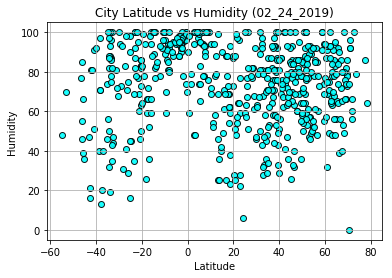

In [9]:
fig, ax = plt.subplots()

x_axis = d['Lat']
y_axis = d['Humidity']

plt.scatter(x_axis , y_axis, marker="o", facecolor="Aqua", edgecolors="black", alpha=0.90)

# Incorporate the other graph properties
ax.grid(True)

plt.title(f"City Latitude vs Humidity ({t})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save Figure

plt.savefig(f"City Latitude vs. Humidity_{t}.png")

plt.show()

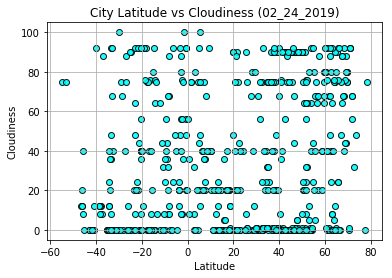

In [10]:
fig, ax = plt.subplots()

x_axis = d['Lat']
y_axis = d['Cloudiness']

plt.scatter(x_axis , y_axis, marker="o", facecolor="Aqua", edgecolors="black", alpha=0.90)

# Incorporate the other graph properties
ax.grid(True)

plt.title(f"City Latitude vs Cloudiness ({t})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save Figure

plt.savefig(f"City Latitude vs. Cloudiness_{t}.png")

plt.show()



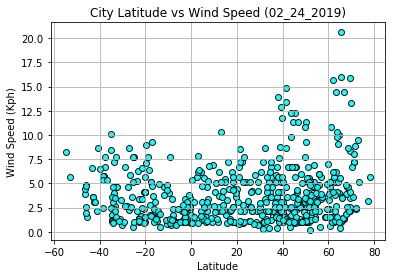

In [11]:
fig, ax = plt.subplots()

x_axis = d['Lat']
y_axis = d['Wind Speed']

plt.scatter(x_axis , y_axis, marker="o", facecolor="Aqua", edgecolors="black", alpha=0.90)

# Incorporate the other graph properties
ax.grid(True)

plt.title(f"City Latitude vs Wind Speed ({t})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Kph)")

# Save Figure

plt.savefig(f"City Latitude vs. Wind Speed_{t}.png")

plt.show()

